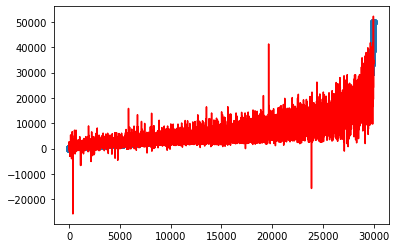

R2: 0.8170436294518924
RMSE: 2607.527569303216


In [9]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import sklearn

def FormatCSV(data):
    data.iloc[:, :] = data.iloc[:, :].replace(to_replace = False, value = 0)
    data.iloc[:, :] = data.iloc[:, :].replace(to_replace = True, value = 1)
    data.iloc[:, :] = data.iloc[:, :].replace(to_replace = 'automatic', value = 2)
    data.iloc[:, :] = data.iloc[:, :].replace(to_replace = 'mechanical', value = 1)
    
def Transform(data, coef):
    result = []
    for x in data:
        element = 0
        for i in range(len(coef)):
            if(i != -1):
                element += x[i] * coef[i]
            else:
                element += x[i] * coef[i]
        result += [[element]]
    
    return result

data = pd.read_csv('X_train.csv')  # load data set
result = pd.read_csv('Y_train.csv')
#print(data.transmission.unique())

data = data.sort_values(['id'])
result = result.sort_values(['id'])

data['price'] = result.price
data = data.sort_values('price')
result = result.sort_values('price')
index = np.arange(0, 30000, 1)

FormatCSV(data)
#print( data.corr().abs()['price'].sort_values(ascending = False)[1:-1])
X = data.loc[:, data.corr().abs()['price'].sort_values(ascending = False)[1:-1].index]

X_2 = X.loc[:, ['transmission',  'odometer', 'feature_7', 'feature_3', 'feature_8', 'feature_6', 'feature_5', 'feature_2', 'feature_4', 'feature_9', 'feature_1', 'feature_0']].values
X_1 = X.loc[:, ['year', 'engineCapacity', 'photos']].values
X_1 = np.nan_to_num(X_1)
X_2 = np.nan_to_num(X_2)

#   'odometer', 'year','engineCapacity', 'photos', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9'
#X = data.drop(['id', 'manufacturer', 'model', 'transmission', 'color', 'engineFuel', 'engineType', 'bodyType', 'drivetrain'], axis = 1).values



#Y = result.drop(['id'], axis = 1).values
Y = result.price.values

from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 5, interaction_only = False)
X_1 = pr.fit_transform(X_1)

#coef = [4.77631076e+02, 1.18088513e+03, 7.49256638e+02, 2.03905728e+02, 1.20829463e+03, 1.02326110e+02 -3.28709490e-03, 6.63900844e+02, 5.11730154e+02, 2.26841810e+03, 2.94064985e+02, 7.47388250e+01, -1.07257328e+03, 7.90083064e+02]

#Z = Transform(X, coef)
Z = np.concatenate((X_1, X_2),axis=1)

linear_regressor = LinearRegression(n_jobs = -1)  # create object for the class
linear_regressor.fit(Z, Y)  # perform linear regression
Y_pred = linear_regressor.predict(Z)  # make predictions


plt.scatter(index, Y)
plt.plot(index, Y_pred, color='red')
plt.show()

rmse = sklearn.metrics.mean_squared_error(Y, Y_pred)**0.5
#print(linear_regressor.coef_)
print("R2:", linear_regressor.score(Z, Y))
print("RMSE:", rmse)